# Imports

In [310]:
#Enable matplotlib to display in jupyter notebook & import it
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re
from geopy.geocoders import Nominatim #used in filling missing zipcodes


# Reading Files

In [311]:
#Read Files
#"originals" should never be modified.  They exist to check work.  They should be deleted in our final work
listings_original = pd.read_csv('data/listings.csv')
calendar_oiginal = pd.read_csv('data/calendar.csv')
reviews_original = pd.read_csv('data/reviews.csv')

listings = listings_original.copy()
calendar = calendar_oiginal.copy()
reviews = reviews_original.copy()

# #Final version should just have the code below
# listings = pd.read_csv('data/listings.csv')
# calendar = pd.read_csv('data/calendar.csv')
# reviews = pd.read_csv('data/reviews.csv')


# Clean the Data

## Listings Data

In [312]:
print('start')
#for testing
listings = listings_original.copy()

###remove hosts who have never responded to or received a message
#there are better ways to do this
unused_listings = listings[listings.host_response_time.isnull()].copy()
listings = listings[listings.host_response_time.notnull()]

#listings.columns[(listings.isnull().sum()==3585)]
#returns these (empty variables)
#Index(['neighbourhood_group_cleansed', 'has_availability', 'license','jurisdiction_names'],
      
      
# Description:  
# Original shape = (3585, 95)

# id
# Type: Float
# What: The listing id is a unique id # for each property being listed on airBnB
# Cleaning: SET AS INDEX

#listings.index = set_index('id', inplace=True) #this also sets index but doesn't leave me with id as a column
listings.index = listings.id.copy()

# listing_url
# Type: String
# What: Url in for the listing in the format: "https://www.airbnb.com/rooms/" + listing.id
# Cleaning: leave in for easy access to listings while exploring data

# scrape_id
# Type: int
# What: Identify which webscrape the data came from, all of Boston came from the same scrape: 20160906204935
#Cleaning: Delete.  Not relevant to our analysis
del(listings['scrape_id'])

# last_scraped
# Type: str
# What: The date that our data was scraped, it is the same for all of Boston entries: 2016-09-07
# Cleaning : Convert to date
listings.last_scraped = pd.to_datetime(listings.last_scraped)

# name
# Type: str
# What: This text is the "title" of any listing.  In a search result it would 
#       be the text that users see as the first description of a listing.  It
#       is also the title of the page for a listing in browser history. etc.
# Cleaning:  None
# Uses: keyword analysis
pass

# summary
# Type: str or NaN
# What: Prose that is displayed on listing webpage for "About this listing".
# Cleaning: Fill NaN with "" so that all types match
# Uses: Keyword analysis
pass
len(listings.summary.unique()) #=3114
listings.summary = listings.summary.fillna('')
listings.summary[listings.summary == ''].count() #=143
listings.summary.value_counts().index[1] #most common summary other than ""
listings[listings.summary == listings.summary.value_counts().index[1]]
#more exploration of duplicates needed


# space
# Type: str or NaN
# What: [OPTIONAL] Prose to describe the inside space of a listing
# Cleaning: Fill NaN with "" so that all types match
listings.space.isnull().any()
len(listings.space.unique()) #=2269
listings.space = listings.space.fillna('')
listings.space[listings.space == ''].count() #=1057
listings.space.value_counts()
#more exploration of duplicates needed

# description
# Type: str
# What: Prose that contains the first 1000 characters of the merging of other descriptive prose:
#     summary
#     space
#     experiences_offered
#     neighborhood_overview
#     notes
#     transit
#     access
#     interaction
#     house_rules
# Cleaning: Delete.  the fact that it only gives us the first 1000 characters makes it unuseful.
del(listings['description'])

# experiences_offered
# Type: str
# What: 'none' for every entry
# Cleaning: Delete
del(listings['experiences_offered'])

# neighborhood_overview
# Type: str or NaN
# What: [OPTIONAL] description by host of the neighborhood 
# Cleaning: Fill NaN with "" so that all types match
listings.neighborhood_overview.isnull().sum() #=1415
len(listings.neighborhood_overview.unique()) #=1729
listings.neighborhood_overview = listings.neighborhood_overview.fillna('')
#more exploration of duplicates needed

# notes
# Type: str or NaN
# What: [OPTIONAL] under "Other things to note" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.notes.isnull().sum() #=1975
listings.notes = listings.notes.fillna('')
len(listings.notes.unique()) #=1270
#more exploration of duplicates needed


# transit
# Type: str or NaN
# What: [OPTIONAL] under "Getting around" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.transit.isnull().sum()
listings.transit = listings.transit.fillna('')
len(listings.transit.unique())
#more exploration of duplicates needed


# access
# Type: str or NaN
# What: [OPTIONAL] under "Guest access" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.access.isnull().sum() #=1489
listings.access = listings.access.fillna('') 
len(listings.access.unique()) #=1763
#more exploration of duplicates needed


# interaction
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.interaction.isnull().sum() #=1554
listings.interaction = listings.interaction.fillna('') 
len(listings.interaction.unique()) #=1618
#more exploration of duplicates needed


# house_rules
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.house_rules.isnull().sum() #=1192
listings.house_rules = listings.house_rules.fillna('') 
len(listings.house_rules.unique()) #=1929



# thumbnail_url
# medium_url
# picture_url
# xl_picture_url
# Type: str or NaN
# What: URL to different image resourses
# Cleaning: Delete
del(listings['thumbnail_url'])
del(listings['medium_url'])
del(listings['picture_url'])
del(listings['xl_picture_url'])

# host_id
# Type: int
# What: The listing id is a unique id # for each host on airbnb
# Cleaning: None
# host_url
# Cleaning: Delete
del(listings['host_url'])


# host_name
# Type: str
# What: Host first name only
# Cleaning: append the user id to each host_Name to distinguish between people with the same name
listings['host_name'] = listings['host_name'] + ' ' + str(listings['host_id'])
#listings.host_name.value_counts()

# host_since
# Type: str
# What:
# Cleaning: convert to date
listings.host_since = pd.to_datetime(listings.host_since)

# host_location
# Type: str
# What: Location that the host lives in
# Cleaning: delete (data is not consistent enough to be relevant, perhaps could be cleaned in the future)
del listings['host_location']


# host_about
# Type: Str or Nan
# What: Prose.  Host description of themselves.
# Cleaning: replace NaN with '' so all types match (str)
listings.host_about.isnull().sum() #1309
listings.host_about = listings.host_about.fillna('') 
len(listings.host_about.unique()) #=1241

# host_response_time
# Type: Str or NaN  [nan, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
# What: A value, (probably generated automatically by AirBnB) to indicate how long a message is replied to.
listings.host_response_time.isnull().sum() #471
listings.host_response_time = listings.host_response_time.fillna('') 

# host_response_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of messages that a host responds to
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_response_rate.isnull().sum() #471
(listings.host_response_rate == '0%').sum() #13
listings.host_response_rate = listings.host_response_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)

# host_acceptance_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of offers to rent a room that a host accepts
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_acceptance_rate.isnull().sum() #471
(listings.host_acceptance_rate == '0%').sum() #49
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)
#plt = listings.host_acceptance_rate.hist(bins = 20)
#plt.set_title('host_acceptance_rate')

# host_is_superhost
# Type: Str 't' or 'f'
# What: special designation AirBnB provides to host who meet qulifications.
#       more info at https://www.airbnb.com/superhost/terms
# cleaning: convert to boolean True or False
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: True if x == 't'else False)
listings.host_is_superhost.sum() #407 superhosts

# host_thumbnail_url
# Cleaning: Delete
del(listings['host_thumbnail_url'])

# host_picture_url
# Cleaning: Delete
del(listings['host_picture_url'])

# host_neighbourhood
# Type: Str or Nan
# What: Self reported neighborhood the host lives in.  not reliablie or useful
# Cleaning: delete
del listings['host_neighbourhood']

# host_listings_count
# Type: int
# What: The number of listings that the host has ACROSS ALL OF AIRBNB
# Related: If you want the number of listings that they have in this set, use calculated_host_listings_count

# host_total_listings_count
# Cleaning: Delete
(listings['host_total_listings_count'] == listings['host_listings_count']).all() #true
del(listings['host_total_listings_count'])

# host_verifications
###Unique Values:
##set([item for host in [re.sub(r"[\['\s\]]", '', host, 0).split(',') for host in listings.host_verifications.unique().tolist()] for item in host])
## {'amex',
##  'email',
##  'facebook',  
##  'google',
##  'jumio',
##  'kba',
##  'linkedin',
##  'manual_offline',
##  'manual_online',
##  'phone',
##  'reviews',
##  'sent_id',
##  'weibo'}
# cleaning: Delete
#del listings['host_verifications']

# host_has_profile_pic
# Cleaning: Delete, only 7 don't have a pic, also not relevant to our work
listings.host_has_profile_pic[listings.host_has_profile_pic == 'f'] #there were 7 listings
del(listings['host_has_profile_pic'])

# host_identity_verified
# Type: str ('t' or 'f')
# What: is the hosts identity verified
# Cleaning:
#listings.host_identity_verified.value_counts()  
        #t    2359
        #f     755
listings.host_identity_verified = listings.host_identity_verified == 't'
listings[listings.host_identity_verified == False].host_verifications
#this shows that there are some ways to partially verify a host identity without gaining "host_identity_verrified" status

# street
# Type: str (e.g. Pinehurst Street, Boston, MA 02131, United States) (not all are consistent format)
# What: street that the listing is on.
# Cleaning: delete
#listings.street.str.extract(r'^(.*?)[\s,]').value_counts()
del listings['street']


# neighbourhood
# Type: str 
# What: neighborhood the listing is in
# Cleaning: delete. neighbourhood_cleansed contains better data that matches neighbourhood.geojson (I think)
del listings['neighbourhood']
#n = listings[['neighbourhood','neighbourhood_cleansed']]
#n = n[(n['neighbourhood'] != n['neighbourhood_cleansed'])]
#n[(n['neighbourhood'] == n['neighbourhood'])]
#n.to_csv('neighbourhood_vs_neighbourhood_cleansed.csv')

# neighbourhood_cleansed
# Type: str 
# What: neighborhood the listing is in
# Cleaning: None needed

# neighbourhood_group_cleansed
# Cleaning: Delete, empty variable (all null)
del listings['neighbourhood_group_cleansed']


# city
# Type: str 
# What: City as reported by host.  Not SUPER consistent
# Cleaning: Delete, we have enough good location data from other variables.
del listings['city']

# state
# Type: str.  all values are 'MA'
# Cleaning: delete
del listings['state']

# zipcode
# Type: str or NaN
# What: Zipcode that the listing is in
# Cleaning: Fill in missing zipcodes usings the latitude and longitude.  Cut off anything past the 5th digit

# ###>>>this code has ben commented out because it is slow, uncomment it for fully cleaned data.
# def latlonToZip(lat, lon):
#     geolocator = Nominatim()
#     try:
#         location = geolocator.reverse(str(lat)+','+str(lon))
#         z = re.compile('(\s)([0-9]{5})(,\sUnited)')
#         #print(z.findall(location[0])[0][1])
#         return z.findall(location[0])[0][1]
#     except:
#         print(str(lat)+','+str(lon),'-----',location)
#         return np.nan
    
#     print(str(lat)+','+str(lon),'-----',location)
#     return np.nan
# temp = listings[listings.zipcode.isnull()].copy()
# listings.zipcode.update(temp.apply(lambda x: latlonToZip(x['latitude'], x['longitude']), axis=1))
# listings.zipcode = listings.zipcode.apply(lambda x: x[:5])

# market
# Cleaning: Delete
# listings.market[listings.market != 'Boston'] ######the results from this are very odd
del listings['market']


# smart_location
# Cleaning: Delete, not great data, redunant with 'city' and we have better data for location 
del listings['smart_location']

# country_code
# Cleaning: Delete
#(listings.country_code == listings.country_code[0]).all() #=True: 'US'
del listings['country_code']

# country
#(listings.country == listings.country[0]).all() #=True: 'United States'
del listings['country']

# latitude
listings.latitude


# longitude
######################################################################################################CollinToDO

# is_location_exact
######################################################################################################CollinToDO

# property_type
######################################################################################################CollinToDO

# room_type
######################################################################################################CollinToDO

# accommodates
######################################################################################################CollinToDO

# bathrooms
######################################################################################################CollinToDO

# bedrooms
######################################################################################################CollinToDO

# beds
######################################################################################################CollinToDO

# bed_type
######################################################################################################CollinToDO

# amenities
######################################################################################################CollinToDO


# square_feet
# Cleaning:  We may want to consider deleting this variable, only 56 entries have data
listings.square_feet.isnull().sum() #=3529
listings.square_feet = listings.square_feet.replace('[^0-9.]+','',regex=True).astype(float)

# price
#this regex "replaces" anything that is not a digit or a decimal with the empty string
#effectively removing anything that's not part of the number
listings.price = listings.price.replace('[^0-9.]+','',regex=True).astype(float)


# weekly_price
listings.weekly_price = listings.weekly_price.replace('[^0-9.]+','',regex=True).astype(float)
# monthly_price
listings.monthly_price = listings.monthly_price.replace('[^0-9.]+','',regex=True).astype(float)
# security_deposit
listings.security_deposit = listings.security_deposit.replace('[^0-9.]+','',regex=True).astype(float)
# cleaning_fee
listings.cleaning_fee = listings.cleaning_fee.replace('[^0-9.]+','',regex=True).astype(float)

# guests_included
######################################################################################################CollinToDO

# extra_people
######################################################################################################CollinToDO

# minimum_nights
######################################################################################################CollinToDO

# maximum_nights
######################################################################################################CollinToDO

# calendar_updated
######################################################################################################CollinToDO


# has_availability
# Cleaning: Delete, empty variable (all null)
del listings['has_availability']



# availability_30
######################################################################################################CollinToDO

# availability_60
######################################################################################################CollinToDO

# availability_90
######################################################################################################CollinToDO

# availability_365
######################################################################################################CollinToDO

# calendar_last_scraped
######################################################################################################CollinToDO

# number_of_reviews
######################################################################################################CollinToDO

# first_review
######################################################################################################CollinToDO

# last_review
######################################################################################################CollinToDO

# review_scores_rating
######################################################################################################CollinToDO

# review_scores_accuracy
######################################################################################################CollinToDO

# review_scores_cleanliness
######################################################################################################CollinToDO

# review_scores_checkin
######################################################################################################CollinToDO

# review_scores_communication
######################################################################################################CollinToDO

# review_scores_location
######################################################################################################CollinToDO

# review_scores_value
######################################################################################################CollinToDO

# requires_license
######################################################################################################CollinToDO

# license
# Cleaning: Delete, empty variable (all null)
del listings['license']

# jurisdiction_names
# Cleaning: Delete, empty variable (all null)
del listings['jurisdiction_names']

# instant_bookable
######################################################################################################CollinToDO

# cancellation_policy
######################################################################################################CollinToDO

# require_guest_profile_picture
######################################################################################################CollinToDO

# require_guest_phone_verification
######################################################################################################CollinToDO



# calculated_host_listings_count
# Type: int
# What: The number of listings that the host has THIS data set
# Related: If you want the number of th listings that the host has across ALL of airbnb
#          use host_listings_count
#listings.calculated_host_listings_count == listings.host_listings_count # not all true
#listings[['host_id','calculated_host_listings_count','host_listings_count']][listings.calculated_host_listings_count != listings.host_listings_count]



# reviews_per_month
######################################################################################################CollinToDO



#TO Do:
#delete all listings whose  host_response_time is null


listings_cleaned = listings.copy()
print('done')


start
done


In [313]:
unused_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
24,5498472,https://www.airbnb.com/rooms/5498472,20160906204935,2016-09-07,"4BD/3.5BA, Perfect for families!","Our spacious, modern, immaculate town home is ...","Our 2,400+ square foot home is a hidden gem, t...","Our spacious, modern, immaculate town home is ...",none,"Roslindale is a quiet and family friendly, yet...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.07
32,14690527,https://www.airbnb.com/rooms/14690527,20160906204935,2016-09-07,1 Bedroom Home Suite Home,"My place is good for couples, solo adventurers...",NaN,"My place is good for couples, solo adventurers...",none,NaN,...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
53,12535687,https://www.airbnb.com/rooms/12535687,20160906204935,2016-09-07,In-Law Apartment,"A private, comfortable and fully equipped in-l...",Open floor apartment. The living area has a so...,"A private, comfortable and fully equipped in-l...",none,"Quiet, safe, diverse neighborhood. Walking dis...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
59,735970,https://www.airbnb.com/rooms/735970,20160906204935,2016-09-07,Part of a Large Condo Jamaica Plain,"Bedroom, study and private bath in large condo...",A suite of private rooms -- bedroom with a que...,"Bedroom, study and private bath in large condo...",none,"The neighborhood is complete with all shops, r...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,0.06
68,4792901,https://www.airbnb.com/rooms/4792901,20160906204935,2016-09-07,Spacious room in secluded townhouse,Truly wonderful home in JP. On the beautiful J...,Truly wonderful home in JP. On the beautiful J...,Truly wonderful home in JP. On the beautiful J...,none,Incredible restaurants very close. Two of the ...,...,9.0,f,NaN,NaN,f,strict,f,f,1,0.16
72,519272,https://www.airbnb.com/rooms/519272,20160906204935,2016-09-07,"Cozy Room + Private Bath, JP Boston",Enjoy your stay in our Jamaica Plain home. C...,Enjoy your stay in our Jamaica Plain home. We ...,Enjoy your stay in our Jamaica Plain home. C...,none,"We live in the Stony Brook neighborhood, a blo...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.31
74,8481291,https://www.airbnb.com/rooms/8481291,20160906204935,2016-09-07,"Beautiful, airy room in JP","Quiet, airy, and clean private room in a nice ...",My apartment is on the top floor of a classic ...,"Quiet, airy, and clean private room in a nice ...",none,My apartment is on the quieter end of Jamaica ...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.36
89,12426823,https://www.airbnb.com/rooms/12426823,20160906204935,2016-09-07,"Nice private room, full size bed",Private room with full size bed and shared bat...,NaN,Private room with full size bed and shared bat...,none,NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
99,14109003,https://www.airbnb.com/rooms/14109003,20160906204935,2016-09-07,"3rd floor condo, 2 bedrooms, 2 decks","My place is close to Brendan Behan Pub, The Ha...",NaN,"My place is close to Brendan Behan Pub, The Ha...",none,The pond! The artists. The great bars.,...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN


In [314]:
calendar = calendar_oiginal.copy()


calendar = calendar.drop(calendar.listing_id.isin(unused_listings.id))
remove = calendar.groupby('listing_id').filter(lambda x: x.price.isnull().all())
calendar = calendar.drop(remove.index)

#
calendar.date = pd.to_datetime(calendar.date)
calendar['day_of_week'] = calendar.date.dt.dayofweek

#
calendar.available.replace({'f':False,'t':True}, inplace=True)

#
calendar.price = calendar.price.replace('[^0-9.]+','',regex=True).astype(float)

day_means = calendar.groupby(['listing_id','day_of_week']).price.mean()
day_means = pd.DataFrame(day_means)
day_means.price = day_means.price.fillna(0)
day_means = day_means.to_dict('index')

calendar['price_model'] = list(zip(calendar.listing_id, calendar.day_of_week))
calendar.price_model = calendar.price_model.apply(lambda x: day_means[x]['price'])
calendar['modeled_price'] = np.where(calendar.price.isnull(),calendar.price_model,calendar.price)

calendar['day_revenue'] = np.where(np.invert(calendar.available), calendar.modeled_price, 0)


calendar = calendar.copy()
#calendar

In [315]:
com_host_id = listings[listings.calculated_host_listings_count >2].host_id.unique()

In [316]:
com_list_id = listings.id[listings.host_id.isin(com_host_id)]


In [317]:
com_calendar = calendar[calendar.listing_id.isin(com_list_id)]
com_calendar.head()

,listing_id,date,available,price,day_of_week,price_model,modeled_price,day_revenue
2190,5706985,2017-09-05,True,100.0,1,106.882353,100.0,0.0
2191,5706985,2017-09-04,True,100.0,0,106.734694,100.0,0.0
2192,5706985,2017-09-03,True,100.0,6,104.940000,100.0,0.0
2193,5706985,2017-09-02,True,125.0,5,126.562500,125.0,0.0
2194,5706985,2017-09-01,True,125.0,4,126.562500,125.0,0.0


In [318]:
com_calendar['avail_int'] = com_calendar.available.apply(int)
mean_avail = com_calendar.groupby('date').avail_int.mean()

C:\Users\Stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\Users\Stace\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x223b1910940>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223B1667A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223B46107F0>], dtype=object))

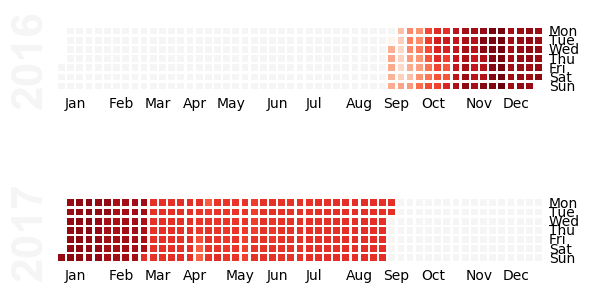

In [319]:
%matplotlib inline
import calmap
calmap.calendarplot(mean_avail)

C:\Users\Stace\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x223b4640a20>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223B466DD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223BC68F080>], dtype=object))

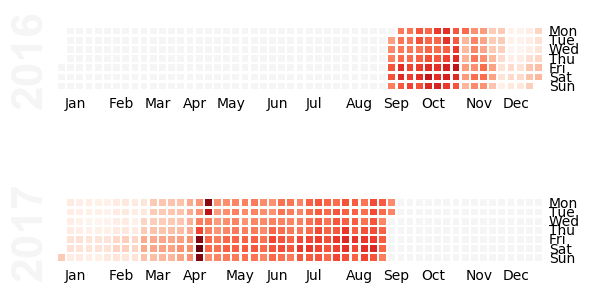

In [320]:
mean_filled_price = com_calendar.groupby('date').modeled_price.mean()
calmap.calendarplot(mean_filled_price)

C:\Users\Stace\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x223bc6629e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223BC5E4D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223BF9662E8>], dtype=object))

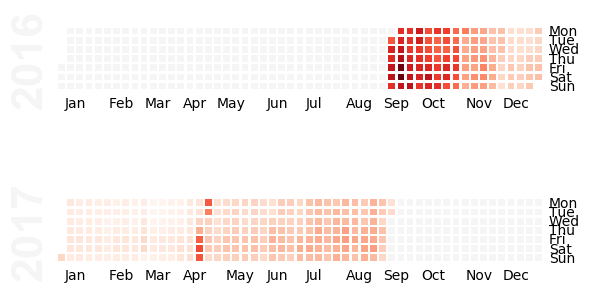

In [321]:
mean_price_available = com_calendar.groupby('date').price.mean()
calmap.calendarplot(mean_price_available)

# Creating Quarterly Revenue

In [322]:
from scipy import stats
#http://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

In [323]:
quarter_dates = ['2016-09-06','2016-12-06','2017-03-06','2017-06-06','2017-07-06']

quarters = [com_calendar[com_calendar.date.isin(pd.date_range(quarter_dates[n], quarter_dates[n+1]))] for n in range(4)]
quarters_revenue = pd.DataFrame(index = pd.Index( com_calendar.listing_id.unique(), name = 'listing_id'))
quarters_revenue = quarters_revenue.join(listings['host_id'])
for n,q in enumerate(quarters):
    quarters_revenue = (quarters_revenue.join(pd.DataFrame(quarters[n].groupby('listing_id').day_revenue.sum()))).rename(columns={'day_revenue':'q'+str(n+1)+'_revenue'})

del listings['id']


In [324]:
combined_data = quarters_revenue.join(listings, how='left',lsuffix='', rsuffix='_lis')
combined_data

,host_id,q1_revenue,q2_revenue,q3_revenue,q4_revenue,listing_url,last_scraped,name,summary,space,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
5706985,6570877,2391.001849,0.000000,0.000000,0.000000,https://www.airbnb.com/rooms/5706985,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,...,10.0,9.0,9.0,f,f,strict,f,f,3,4.00
7482195,34552909,3430.000000,0.000000,0.000000,0.000000,https://www.airbnb.com/rooms/7482195,2016-09-07,Private room near bus stop,A handsome colonial house set on a tranquil si...,,...,NaN,NaN,NaN,f,f,strict,f,f,3,NaN
7252607,34552909,4508.000000,588.000000,0.000000,0.000000,https://www.airbnb.com/rooms/7252607,2016-09-07,Private Room near Public Transport,A handsome colonial house set on a tranquil si...,,...,10.0,9.0,10.0,f,f,strict,f,f,3,0.29
2583074,13226301,1322.658514,0.000000,0.000000,0.000000,https://www.airbnb.com/rooms/2583074,2016-09-07,Cozy room in a charming villa.,"My home is a villa in one of the friendliest, ...",The room is cozy and private. The house is les...,...,10.0,9.0,10.0,f,f,flexible,f,f,3,1.24
7086825,34552909,1960.000000,0.000000,0.000000,0.000000,https://www.airbnb.com/rooms/7086825,2016-09-07,Private Room near public transport,A handsome colonial house set on a tranquil si...,,...,10.0,9.0,10.0,f,f,strict,f,f,3,0.72
8548176,6570877,1367.739265,770.472304,0.000000,0.000000,https://www.airbnb.com/rooms/8548176,2016-09-07,Charming 3 bedroom-15 min to Boston,Lots of room for 3 couples or a family. 3 bed...,Lots of room for 3 couples or a family. 3 bed...,...,10.0,9.0,9.0,f,f,strict,f,f,3,2.07
4922204,6570877,4786.556472,0.000000,0.000000,0.000000,https://www.airbnb.com/rooms/4922204,2016-09-07,Charming new house-15 min to Boston,Roslindale is the new hip section of Boston an...,Guests can use the entire house but if your gr...,...,10.0,10.0,9.0,f,f,strict,f,f,3,4.32
4461111,13226301,3870.000000,1170.000000,0.000000,0.000000,https://www.airbnb.com/rooms/4461111,2016-09-07,Queen room in a charming villa,The house is located in a friendly and safe n...,The room is private and has two windows overl...,...,9.0,7.0,9.0,f,f,flexible,f,f,3,0.54
3575220,13226301,4145.355619,630.803698,0.000000,0.000000,https://www.airbnb.com/rooms/3575220,2016-09-07,The Artist room in beautiful villa.,"My home is a villa in one of the friendliest, ...",The room is spacious and private. The house is...,...,10.0,9.0,10.0,f,f,flexible,f,f,3,0.33


In [345]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
analysis_data = pd.DataFrame(combined_data, columns=['q1_revenue','number_of_reviews','number_of_reviews', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'])
analysis_data.dropna(inplace=True)

analysis_data_y = (analysis_data['q1_revenue']).copy()
#withholding 'number_of_reviews_'
analysis_data_x = analysis_data[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value']].copy()

In [346]:
#Divided the review_scores_rating by 100 to normalize
analysis_data_x['review_scores_rating'] = analysis_data_x['review_scores_rating'] / 10

In [347]:
analysis_data_x

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
listing_id,,,,,,,
5706985,9.0,10.0,10.0,10.0,10.0,9.0,9.0
7252607,9.5,9.0,10.0,10.0,10.0,9.0,10.0
2583074,9.9,10.0,10.0,10.0,10.0,9.0,10.0
7086825,9.8,9.0,9.0,10.0,10.0,9.0,10.0
8548176,9.1,10.0,10.0,10.0,10.0,9.0,9.0
4922204,9.5,10.0,10.0,10.0,10.0,10.0,9.0
4461111,10.0,9.0,10.0,10.0,9.0,7.0,9.0
3575220,9.7,10.0,9.0,10.0,10.0,9.0,10.0
5601743,8.2,8.0,7.0,9.0,9.0,9.0,8.0


In [348]:
analysis_data_x = analysis_data_x.loc[:,~analysis_data_x.columns.duplicated()]

In [349]:
reg = linear_model.LinearRegression()

In [350]:
x_train,x_test,y_train,y_test = train_test_split(analysis_data_x, analysis_data_y, test_size = 0.2, random_state = 4)

In [351]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [352]:
reg.coef_

array([ 167.94066467,  470.0257302 ,  987.94425264, -149.06462571,
       -419.28232512,  823.83961667, -638.38229061])

In [353]:
predicted_answers = reg.predict(x_test)

In [354]:
predicted_answers[2]

7087.4067267285282

In [355]:
y_test.iloc[2]

10140.495402685503

In [356]:
#mean-squared error
np.mean((predicted_answers-y_test)**2)



47394391.236989245